# Homework 3 - Introduction to Data Science - Fall 2021

# Guidelines
- If asked to fit a model to given data, do not preprocess the given data before fitting. 
- Use default values for any parameters not mentioned in a problem statement.
- Comment where appropriate for clarity.

# Problem 1

We will apply decision trees to the `Titanic` dataset for prediction of passenger survival. The dataset contains the following variables:

* `Pclass`: Ticket class where 1 = 1st, 2 = 2nd, 3 = 3rd
* `Sex`: Female/male
* `Embarked`: Port of Embarkation where C = Cherbourg, Q = Queenstown, S = Southampton
* `SibSp`: Number of siblings
* `Parch`: Number of parents
* `Age`: Age in years	
* `Fare`: Passenger fare	
* `Survived`: 0 = No, 1 = Yes

In [1]:
import pandas as pd

titanic = pd.read_csv("titanic.csv")

# Select subset of columns.
columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Age','Fare','Survived']
titanic = titanic[columns]

# Fill NA values.
titanic['Embarked'].fillna("S", inplace=True)
med_age = int(titanic['Age'].median())
titanic['Age'].fillna(med_age, inplace=True)

# Encode classes as integers.
titanic['Sex'] = titanic['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
titanic['Embarked'] = titanic['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

# Print.
titanic

,Pclass,Sex,Embarked,SibSp,Parch,Age,Fare,Survived
0,3,1,1,1,0,22.0,7.2500,0
1,1,0,2,1,0,38.0,71.2833,1
2,3,0,1,0,0,26.0,7.9250,1
3,1,0,1,1,0,35.0,53.1000,1
4,3,1,1,0,0,35.0,8.0500,0
...,...,...,...,...,...,...,...,...
886,2,1,1,0,0,27.0,13.0000,0
887,1,0,1,0,0,19.0,30.0000,1
888,3,0,1,1,2,28.0,23.4500,0
889,1,1,2,0,0,26.0,30.0000,1


In [2]:
from sklearn.model_selection import train_test_split

# Test/train split.
X_titan = titanic.drop('Survived', axis = 1)
y_titan = titanic[['Survived']]
X_titan_train, X_titan_test, y_titan_train, y_titan_test = train_test_split(X_titan, y_titan, test_size=1/3, random_state=42)

## 1.1
For `max_depth` ranging from 1 to 50, fit decision tree classifiers using `random_state=42` and store the training and test accuracies in the given variables.

Best prediction accuracy:  0.8215488215488216
Depth:  3


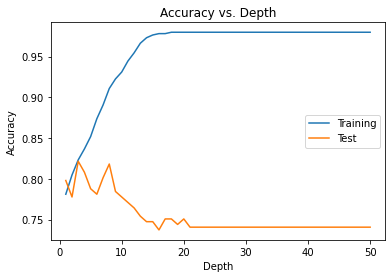

In [3]:
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

depth = np.arange(1,51,1)
dtaccuracy_train = [] # List for storing training accuracies.
dtaccuracy_test = [] # List for storing test accuracies.

### YOUR CODE HERE:
model = []
# for max_depth from 1 to 15
for i in depth:
    
    # build the model
    classifier = tree.DecisionTreeClassifier(max_depth = i, random_state = 42)
    
    # fit the training set
    classifier.fit(X_titan_train, y_titan_train)
    
    # save the classifier for future use
    model.append(classifier)
    # prediction on training and test set
    y_train_pred = classifier.predict(X_titan_train)
    y_test_pred = classifier.predict(X_titan_test)
    
    # compute the accuracy
    y_train_acc = accuracy_score(y_titan_train, y_train_pred)
    y_test_acc = accuracy_score(y_titan_test, y_test_pred)
    
    dtaccuracy_train.append(y_train_acc)
    dtaccuracy_test.append(y_test_acc)

print("Best prediction accuracy: ", max(dtaccuracy_test))
print("Depth: ", depth[dtaccuracy_test.index(max(dtaccuracy_test))])

plt.plot(depth, dtaccuracy_train, label = "Training")
plt.plot(depth, dtaccuracy_test, label = "Test")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Depth")
plt.legend()
plt.show()

## 1.2
What trends do you observe in the training and test accuracies as depth increases? Explain these trends.

### Answer: 
- The difference between training and test accuracy increases for the max_depth in the range of 1 to 20 after that this difference become constant for max_depth in the range of 21 to 50. The trend in increasing for training set and its decreasing for test set for  max_depth in the range of 1 to 20. After that the trend is constant for both the training and test accuracy


## 1.3
For the decision tree with the best test accuracy, print the three most important features.

In [4]:
# get the best classifier
best_classifier = model[dtaccuracy_test.index(max(dtaccuracy_test))]

# Gini based feature importances, minimum value will have high importance
importance = best_classifier.feature_importances_.argsort()
features = X_titan.columns
# three most important features
most_imp_3 = [x for _,x in sorted(list(zip(importance,features)))][:3]
print(most_imp_3)

['Age', 'Fare', 'Pclass']


# Problem 2
We continue to explore prediction on the `Titanic` dataset with random forests.

## 2.1
For `n_estimators` ranging from 1 to 201 with step size 10, fit random forest classifiers using `random_state=42` and `max_depth=3`. Store the training and test accuracies in the given variables.

Best prediction accuracy:  0.8282828282828283
n_estimators:  101


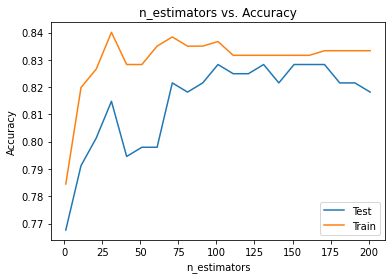

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rf_arru_lst_test = [] # List for storing training accuracies.
rf_arru_lst_train = [] # List for storing test accuracies.
n_estimators_lst = np.arange(1,202,10)


# YOUR CODE HERE:
for i in n_estimators_lst:
    classifier = RandomForestClassifier(n_estimators = i, random_state = 42,max_depth = 3)
    
    # fit the training set
    classifier.fit(X_titan_train, np.ravel(y_titan_train))
    
    # prediction on training and test set
    y_train_pred = classifier.predict(X_titan_train)
    y_test_pred = classifier.predict(X_titan_test)
    
    # compute the accuracy
    y_train_acc = accuracy_score(y_titan_train, y_train_pred)
    y_test_acc = accuracy_score(y_titan_test, y_test_pred)
    
    rf_arru_lst_train.append(y_train_acc)
    rf_arru_lst_test.append(y_test_acc)

# print "Best prediction accuracy" and corresponding "n_estimators"
# YOUR CODE HERE:
print("Best prediction accuracy: ", max(rf_arru_lst_test))
print("n_estimators: ", n_estimators_lst[rf_arru_lst_test.index(max(rf_arru_lst_test))])


# plot the accuracies
plt.plot(n_estimators_lst, rf_arru_lst_test, label = "Test")
plt.plot(n_estimators_lst, rf_arru_lst_train, label = "Train")
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('n_estimators vs. Accuracy')
plt.legend()
plt.show()

## 2.2
What trends do you observe in the training and test accuracies as `n_estimators` increases? Explain these trends.

### Answer:
- Initially as n_estimators increases The trend is increasing for both training and test accuracies, later it becomes decreasing and finally it is almost constant for remaining values of n_estimators.

## 2.3
`GridSearchCV` is a class to assist in finding the best parameters for a model. Read about `GridSearchCV` here:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

To use `GridSearchCV`, follow these steps:
* Create your model object.
* Create a dictionary with the model parameters and ranges over which you want to optimize.
* Create a `GridSearchCV` object and fit it on your training data.
* Access the attributes of the `GridSearchCV` object to find the optimal parameters and scores.

For a Random Forest model with `random_state=42`, use `GridSearchCV` with 10-fold CV to determine the best combination of the following parameters:
* `max_depth` ranging from 1 to 10
* `n_estimators` ranging from 1 to 10

Print the best parameters and corresponding score.

In [6]:
from sklearn.model_selection import GridSearchCV

# create the default model
# YOUR CODE HERE:
rfc=RandomForestClassifier(random_state=42)

# Grid of parameters over which to optimize.
# YOUR CODE HERE:
param_grid = { 
    'n_estimators': [1,2,3,4,5,6,7,8,9,10],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10]
}

# search the grid
# YOUR CODE HERE:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_titan_train, np.ravel(y_titan_train))

# Print the "Best parameters" and its "Score"
# YOUR CODE HERE:
print(CV_rfc.best_params_)

{'max_depth': 9, 'n_estimators': 10}


# Problem 3

We will apply logistic regression to the problem of classifying images of fashion articles in the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist).

In [7]:
import numpy as np
import pandas as pd

fash = pd.read_csv("fash.csv")
labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"]
fash['label'].replace(to_replace=np.arange(0,10), value=labels, inplace=True)

X_fash = fash.iloc[:, 1:]
y_fash = fash.iloc[:, 0]

display(fash)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Pullover,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Shirt,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,T-shirt/top,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Dress,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Bag,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,Trouser,0,0,0,0,0,0,0,0,0,...,164,0,0,0,0,0,0,0,0,0
997,Coat,0,0,0,0,0,0,0,0,1,...,0,0,0,0,170,193,11,0,0,0
998,Sneaker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.1
Fit a logistic regression model for image classification to the data with `penalty="none"`. Print the first three images using [`matplotlib.pyplot.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) along with your model classifications and the predicted probabilities of each class.

Image-1
-------------------------------
model classifications: Pullover
model Probability: 1.0


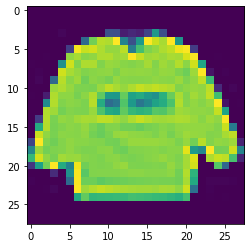

Image-2
-------------------------------
model classifications: Ankle boot
model Probability: 1.0


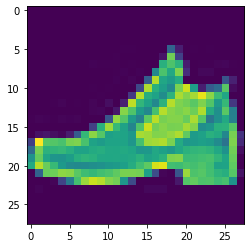

Image-3
-------------------------------
model classifications: Shirt
model Probability: 1.0


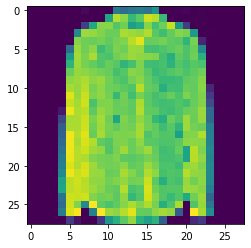

In [8]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# YOUR CODE HERE:

# create a fresh copy
new_fash = fash.copy()

# replace the label with numeric values.
new_fash['label'] = new_fash['label'].replace(labels,np.arange(0,10))

X_new_fash = new_fash.iloc[:, 1:]
y_new_fash = new_fash.iloc[:, 0]

# build the model
lr = LogisticRegression(penalty='none')
lr.fit(X_new_fash,y_new_fash)
y_pred = lr.predict(X_new_fash)

# get the Probability estimates
prob = lr.predict_proba(X_new_fash)

for i in range(3):
    print('Image-{}'.format(i+1))
    print('-------------------------------')
    f = X_new_fash.loc[i].values
    print('model classifications:',labels[y_pred[i]])
    print('model Probability:',prob[i][prob[i].argmax()])
    plt.imshow(f.reshape(28,28))
    plt.show()

## 3.2
In the previous part we used no penalty term. Now we will explore L2 penalization. Answer the following questions in the context of logistic regression:
1. What is L2 penalization?
2. What main benefit does it have and how does it achieve that?

### Answer:
- Regularization is the technique to penalize complex models in machine learning, it is used to reduce over fitting and L2 penalization is one such technique.

- L2 penalization is called Ridge Regression, which adds "squared magnitude" of coefficient as penalty term to the loss function to reduce overfitting.

## 3.3
Fit logistic regression models to the data using L2 regularization and the given values of `C`. Determine the optimal value of the inverse regularization strength parameter $C$ by performing 5-fold cross-validation. Plot the averaged `accuracy_score` associated with the each model against $\log(C)$.

Optimal C: 0.01


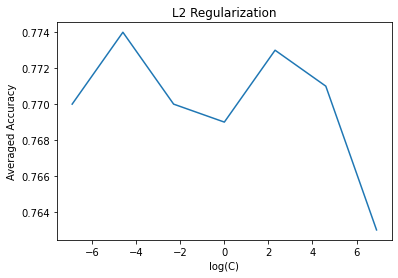

In [9]:
from numpy.linalg import norm
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

C = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
cv_scores = [0]*7 # List for storing the averaged accuracies.

# YOUR CODE HERE:

# iterate through C and build LogisticRegression model
for indx,i in enumerate(C):
    lr = LogisticRegression(penalty='l2',C=i)
    lr.fit(X_new_fash,y_new_fash)
    scores = cross_val_score(lr, X_new_fash,y_new_fash, cv=5, scoring='accuracy')
    cv_scores[indx] = scores.mean()


# Print the "Optimal C"
# YOUR CODE HERE:
print("Optimal C:",C[cv_scores.index(max(cv_scores))])


plt.plot(np.log(C), cv_scores)
plt.xlabel("log(C)")
plt.ylabel("Averaged Accuracy")
plt.title("L2 Regularization")
plt.show()

## 3.4
Perform a random 80/20 split into training and test data set and use the optimal `C` of Problem 3.3 to train a logistic regression model. Plot the confusion matrix of the test set.

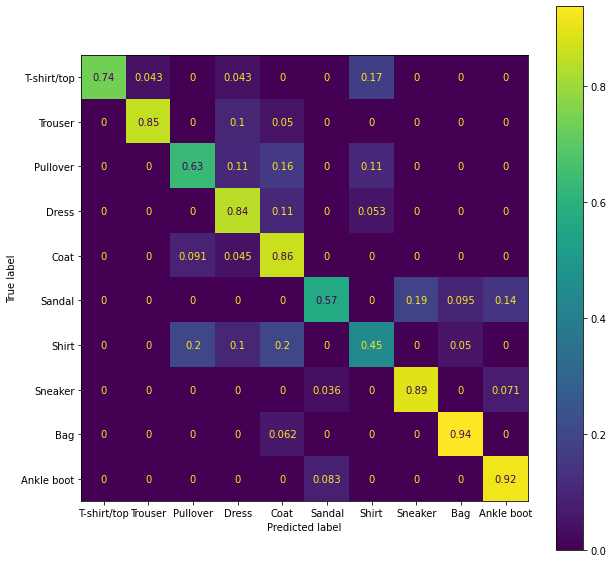

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# YOUR CODE HERE:
X_train, X_test, y_train, y_test = train_test_split(X_new_fash,y_new_fash, test_size=0.2,random_state=42)
lr = LogisticRegression(C=0.01,random_state=42)
lr.fit(X_train,y_train)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(lr, X_test, y_test,normalize='true',ax=ax,display_labels=labels)
plt.show()

## 3.5
For this model, which is the class label with the lowest classification accuracy in the test set?

### Answer:
- As we can see in the confusion matrix, the class label for the lowest classification accuracy(i.e 0.45) in the test set is 'Shirt' 

# Problem 4

We explore classification using support vector machines (SVM) on the [`wine`](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset) dataset. Wines are divided into class 0 and class 1.

     color_intensity   hue
0               5.64  1.04
1               4.38  1.05
2               5.68  1.03
3               7.80  0.86
4               4.32  1.04
..               ...   ...
173             7.70  0.64
174             7.30  0.70
175            10.20  0.59
176             9.30  0.60
177             9.20  0.61

[178 rows x 2 columns]
0      1
1      1
2      1
3      1
4      1
      ..
173    0
174    0
175    0
176    0
177    0
Name: target, Length: 178, dtype: int32


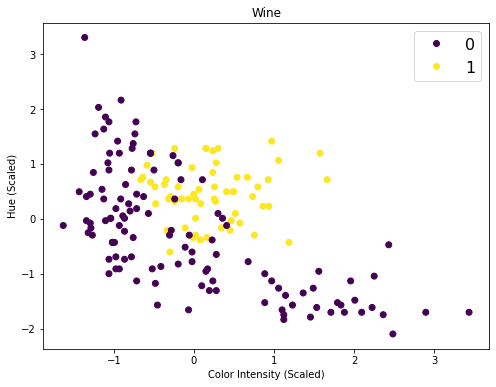

In [11]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

X_wine = datasets.load_wine(as_frame = True).data[['color_intensity', 'hue']]
y_wine = (datasets.load_wine(as_frame = True).target == 0)*1

print(X_wine)
print(y_wine)

# Scale X_wine.
scaler = StandardScaler()
X_wine = scaler.fit_transform(X=X_wine)

fig, ax = plt.subplots(figsize=(8,6));
scatter = ax.scatter(X_wine[:,0], X_wine[:,1],c=y_wine)
ax.legend(handles=scatter.legend_elements()[0],labels=['0','1'], fontsize=16);
ax.set_xlabel("Color Intensity (Scaled)")
ax.set_ylabel("Hue (Scaled)")
ax.set_title("Wine");

## 4.1
Fit an SVM model with a linear kernel to the whole dataset and print the accuracy on the whole dataset.

In [12]:
from sklearn.metrics import accuracy_score
from sklearn import svm

# YOUR CODE HERE:
SVM_classifier = svm.SVC()
SVM_classifier.fit(X_wine, y_wine)
# Prediction on Test set
y_pred = SVM_classifier.predict(X_wine)
acc = accuracy_score(y_wine,y_pred)
print(acc)

0.8820224719101124


## 4.2
Describe qualitatively why SVM with linear kernel has limited accuracy for this dataset.

### Answer:
- Since SVM with linear kernal is fit only for linearly separable data but the given dataset contains non linearly separable data. Hence accuracy is less

## 4.3
Perform 10-fold CV with the following two SVM models:
- One using an RBF kernel with C=1.
- One using an RBF kernel with C=1e4.

Print the mean 10-fold CV accuracies of the models.

In [13]:
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import cross_val_score

# YOUR CODE HERE:
svc1 = svm.SVC(C=1,kernel='rbf')
svc2 = svm.SVC(C=1e4,kernel='rbf')
scores1 = cross_val_score(svc1, X_wine, y_wine, cv=10, scoring='accuracy')
scores2 = cross_val_score(svc2, X_wine, y_wine, cv=10, scoring='accuracy')


# Print the 'C=1 Mean Accuracy' and the 'C=1e4 Mean Accuracy'
# YOUR CODE HERE:
print('C=1 Mean Accuracy:',scores1.mean())
print('C=1e4 Mean Accuracy:',scores2.mean())

C=1 Mean Accuracy: 0.8549019607843137
C=1e4 Mean Accuracy: 0.8379084967320262


## 4.4
For each of the two models, create a plot showing:
- The decision boundaries and margins, and
- the support vectors (highlighted).

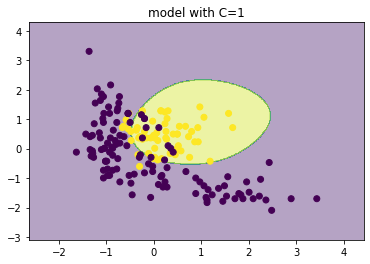

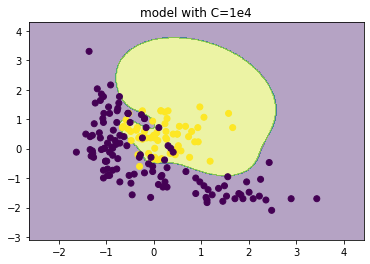

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Create grid to evaluate model
X = X_wine
y = y_wine

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,0.02),
                       np.arange(x2_min, x2_max,0.02))

# Fit the model with C=1.
svc1.fit(X_wine, y_wine)

# Plot decision boundary and margins
Z = svc1.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z,alpha=0.4)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.scatter(X_wine[:,0], X_wine[:,1],c=y)
plt.title('model with C=1')
plt.show()
# Fit the model with C=1e4.
svc2.fit(X_wine, y_wine)


# Plot decision boundary and margins
Z = svc2.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z,alpha=0.4)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.scatter(X_wine[:,0], X_wine[:,1],c=y)
plt.title('model with C=1e4')
plt.show()